In [23]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.ddpg_models as models
from pytorch_drl.utils.exploration import *
from pytorch_drl.algs.td3 import TD3

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#
#device = "cpu"
print("Device:", device)


Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [25]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[arr[0]]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

## 2. Create environment

In [26]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.shape[0]

print("State size:", state_size, "\nAction size:", action_size)
print(env.action_space.high, env.action_space.low)

State size: 3 
Action size: 1
[2.] [-2.]


## 3. Define parameters

In [6]:
max_t = 1000
n_episodes = 2_000
seed = 0

## 4. TD3 Test



In [ ]:
value_net_constructor = models.DDPGValueNetwork
value_net_args = (state_size, action_size, 256, 256)

policy_net_constructor = models.DDPGPolicyNetwork
policy_net_args = (state_size, action_size, 256, 256)

max_act = env.action_space.high
min_act = env.action_space.low

noise_proc = Gaussian(x_size=env.action_space.shape, 
                      mu=0., sigma_init=0.1, sigma_final=1, 
                      sigma_horizon=1)

action = env.action_space.sample()
#noise_proc = OrnsteinUhlenbeck(x0=np.zeros_like(action))

lr_val = 1e-3
lr_pol = 1e-3


agent = TD3(policy_net_constructor=policy_net_constructor,
            policy_net_args=policy_net_args,
            value_net_constructor=value_net_constructor,
            value_net_args=value_net_args,
            policy_noise=0.2,
            noise_clip=0.5,
            gamma=0.99, 
            lr_val=lr_val,
            lr_pol=lr_pol,
            prioritized_replay=False,
            is_beta=0.6,
            beta_horz=10e5,
            pr_alpha=0.0,
            buf_size=int(1e6),
            batch_size=128,
            tau=1e-2,
            device=device,
            normalize_rewards=False,
            max_grad_norm=0.5,
            n=1,
            nstep=False,
            min_act=min_act,
            max_act=max_act,
            warm_up=1e4,
            noise_process=noise_proc,
            update_interval=2,
            seed=0
                )

# train the agent
scores = tester.train_agent(agent, env, max_t, n_episodes,
                            "td3_pendulum", render_freq=1000, log=True, max_score=-200, test_freq=20)
# plot the training:
plot(scores)

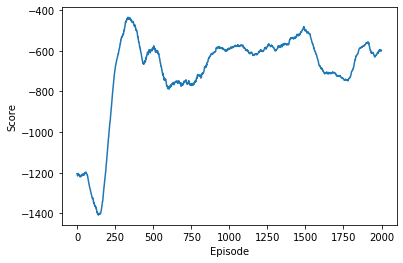

In [12]:
plot(scores, 100)

### 4.1 Trained Agent Demonstration

In [13]:
tester.test_agent(agent, env, max_t, render=True, num_of_episodes=5, log=True)

/home/selo/anaconda3/envs/ml-agents/lib/python3.6/site-packages/torch/nn/functional.py:1347: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


-3.3173269145751303
-126.75916977548012
-116.70300980333347
-126.41572431523988
-129.70688805872982


-100.58042377347168